Any imports needed for statistical analysis

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

Turn the dataframes into multiple lists: One for the likes of Trump tweets before the debate ended, one for the likes of Trump tweets after the debate ended, one for the likes of Biden tweets before the debate ended, one for the likes of Biden tweets after the debate ended.

In [2]:
df = pd.read_csv("debate_tweets_with_sentiment.csv")

filtered_df_trump = df[df['about'] == 'trump']
filtered_df_biden = df[df['about'] == 'biden']

cutoff_time = "2020-10-22 23:00:00"

filtered_df_trump_before = filtered_df_trump[filtered_df_trump['created_at'] < cutoff_time]
filtered_df_trump_after = filtered_df_trump[filtered_df_trump['created_at'] >= cutoff_time]

filtered_df_biden_before = filtered_df_biden[filtered_df_biden['created_at'] < cutoff_time]
filtered_df_biden_after = filtered_df_biden[filtered_df_biden['created_at'] >= cutoff_time]

print("Trump tweets before 11 PM:", len(filtered_df_trump_before))
print("Trump tweets after 11 PM:", len(filtered_df_trump_after))
print("Biden tweets before 11 PM:", len(filtered_df_biden_before))
print("Biden tweets after 11 PM:", len(filtered_df_biden_after))

filtered_df_trump_before_list = filtered_df_trump_before['likes'].tolist()
filtered_df_trump_after_list = filtered_df_trump_after['likes'].tolist()
filtered_df_biden_before_list = filtered_df_biden_before['likes'].tolist()
filtered_df_biden_after_list = filtered_df_biden_after['likes'].tolist()

print(filtered_df_trump_before_list)
print(filtered_df_trump_after_list)
print(filtered_df_biden_before_list)
print(filtered_df_biden_after_list)

Trump tweets before 11 PM: 41229
Trump tweets after 11 PM: 50708
Biden tweets before 11 PM: 28379
Biden tweets after 11 PM: 47086
[0.0, 305.0, 1.0, 1.0, 0.0, 2.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 1.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 3.0, 1.0, 0.0, 1.0, 3.0, 1.0, 9.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 2.0, 1.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 2.0, 0.0, 7.0, 2.0, 0.0, 0.0, 26.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 0.0, 3.0, 381.0, 0.0, 0.0, 9.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 331.0, 1.0, 2.0, 0.0, 0.0, 2.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 12.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 2.0, 11.0, 1.0, 1.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 1.0, 3.0, 7.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 2.0, 3.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0

Function to conduct T-test

In [3]:
def perform_t_test(sentiment_before, sentiment_after):
    t_stat, p_value = stats.ttest_ind(sentiment_before, sentiment_after, equal_var=False)
    return t_stat, p_value

Run the T-test on the lists of likes

In [4]:
print(perform_t_test(filtered_df_trump_before_list, filtered_df_trump_after_list))
print(perform_t_test(filtered_df_biden_before_list, filtered_df_biden_after_list))

(-3.2708712384385294, 0.001072660378581379)
(-0.552990306713, 0.5802717811618678)


Turn the dataframes into multiple lists: One for the sentiment of Trump tweets before the debate ended, one for the sentiment of Trump tweets after the debate ended, one for the sentiment of Biden tweets before the debate ended, one for the sentiment of Biden tweets after the debate ended.

In [5]:
df = pd.read_csv("debate_tweets_with_sentiment.csv")

filtered_df_trump = df[df['about'] == 'trump']
filtered_df_biden = df[df['about'] == 'biden']

cutoff_time = "2020-10-22 23:00:00"

filtered_df_trump_before = filtered_df_trump[filtered_df_trump['created_at'] < cutoff_time]
filtered_df_trump_after = filtered_df_trump[filtered_df_trump['created_at'] >= cutoff_time]

filtered_df_biden_before = filtered_df_biden[filtered_df_biden['created_at'] < cutoff_time]
filtered_df_biden_after = filtered_df_biden[filtered_df_biden['created_at'] >= cutoff_time]

print("Trump tweets before 11 PM:", len(filtered_df_trump_before))
print("Trump tweets after 11 PM:", len(filtered_df_trump_after))
print("Biden tweets before 11 PM:", len(filtered_df_biden_before))
print("Biden tweets after 11 PM:", len(filtered_df_biden_after))

nlp_trump_before_list = filtered_df_trump_before['Compound_Score'].tolist()
nlp_trump_after_list = filtered_df_trump_after['Compound_Score'].tolist()
nlp_biden_before_list = filtered_df_biden_before['Compound_Score'].tolist()
nlp_biden_after_list = filtered_df_biden_after['Compound_Score'].tolist()

print(nlp_trump_before_list)
print(nlp_trump_after_list)
print(nlp_biden_before_list)
print(nlp_biden_after_list)

Trump tweets before 11 PM: 41229
Trump tweets after 11 PM: 50708
Biden tweets before 11 PM: 28379
Biden tweets after 11 PM: 47086
[0.0, 0.0, 0.0, 0.0, -0.296, -0.34, -0.5859, 0.6705, 0.0, 0.0, -0.3724, 0.128, 0.5267, 0.0, 0.0, 0.0, 0.0, 0.1533, -0.4939, -0.6506, 0.4939, 0.3818, 0.8567, 0.0, 0.0, 0.1779, -0.7783, 0.3612, -0.3941, -0.7149, 0.1531, 0.0, -0.4588, -0.6597, 0.8158, 0.0, 0.5473, -0.7964, -0.594, 0.0356, 0.0, 0.0, 0.6135, 0.7096, 0.0, 0.3612, 0.0, -0.2023, 0.0, 0.0, 0.4404, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8625, -0.3818, 0.4019, -0.3875, 0.2759, 0.0, 0.0, 0.0, 0.5106, 0.5407, 0.0, 0.0, 0.0, -0.3612, 0.0, 0.8126, 0.0, 0.0, -0.3355, 0.0, 0.0, 0.0, 0.5859, -0.5255, -0.4412, 0.0, 0.0, 0.7482, 0.0, -0.5588, -0.0772, 0.5067, 0.0, -0.6184, -0.0823, -0.2023, -0.6597, 0.6597, -0.4767, 0.1531, 0.0, -0.7322, -0.4023, 0.0, 0.0, -0.5849, 0.6486, 0.5983, 0.0, 0.0, 0.4215, 0.0, 0.1007, -0.6249, 0.0, -0.2732, 0.7096, 0.0, -0.3956, -0.1027, -0.3612, 0.0, 0.0, 0.5473, 0.5413, 0.4404, -0.6588, -0.8807

Histograms of sentiment for each of the lists.

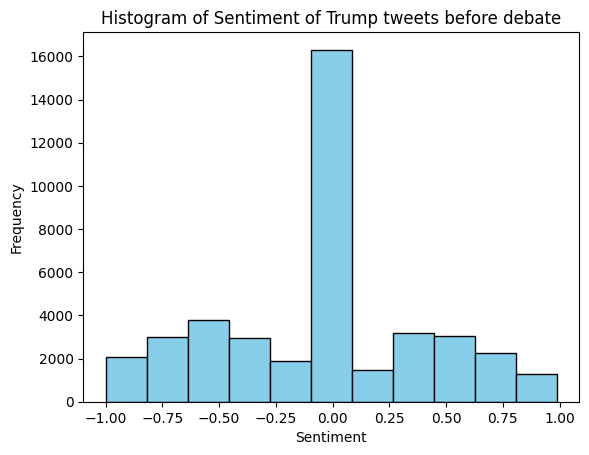

In [6]:
data = nlp_trump_before_list

plt.hist(data, bins=11, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment of Trump tweets before debate')
plt.show()

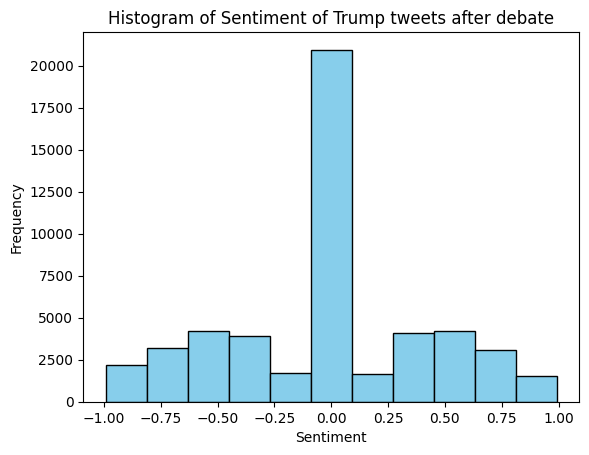

In [7]:
data = nlp_trump_after_list

plt.hist(data, bins=11, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment of Trump tweets after debate')
plt.show()

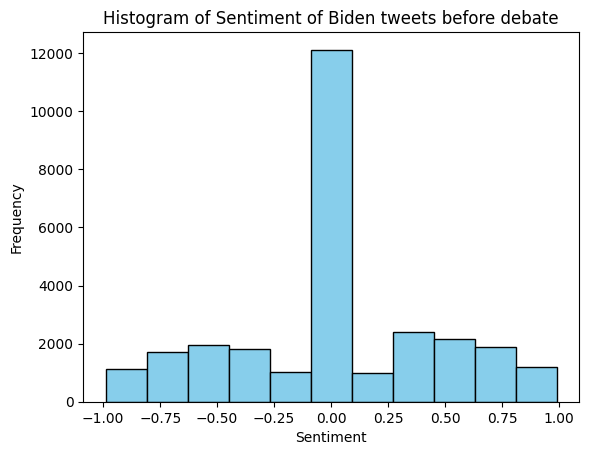

In [8]:
data = nlp_biden_before_list

plt.hist(data, bins=11, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment of Biden tweets before debate')
plt.show()

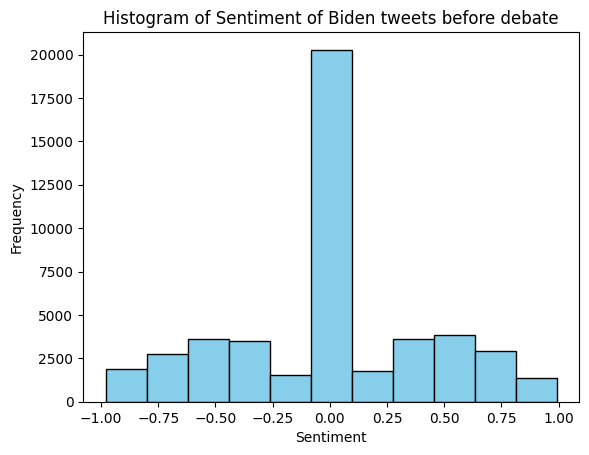

In [9]:
data = nlp_biden_after_list

plt.hist(data, bins=11, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment of Biden tweets before debate')
plt.show()

Conduct the T-test on sentiment list

In [10]:
avg_biden_before = sum(nlp_biden_before_list)/len(nlp_biden_before_list)
avg_biden_after = sum(nlp_biden_after_list)/len(nlp_biden_after_list)
avg_trump_before = sum(nlp_trump_before_list)/len(nlp_trump_before_list)
avg_trump_after = sum(nlp_trump_after_list)/len(nlp_trump_after_list)

print("Average Biden Before:", avg_biden_before)
print("Average Biden After:", avg_biden_after)
print("Average Trump Before:", avg_trump_before)
print("Average Trump After:", avg_trump_after)

t_stat_biden, p_value_biden = perform_t_test(nlp_biden_before_list, nlp_biden_after_list)
t_stat_trump, p_value_trump = perform_t_test(nlp_trump_before_list, nlp_trump_after_list)

print(t_stat_biden, p_value_biden)
print(t_stat_trump, p_value_trump)

Average Biden Before: 0.018526568941823425
Average Biden After: 0.0025925944017330875
Average Trump Before: -0.04178603167673248
Average Trump After: -0.011748698430227807
4.868269637848884 1.128719858429446e-06
-10.183971306564702 2.412673491902754e-24


Combine the four sentiment lists into a single DataFrame and then run a two‐way ANOVA testing for the effects of Candidate (Trump vs. Biden), Time (Pre‑debate vs. Post‑debate), and their interaction on the Compound_Score

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

sentiment_scores = (nlp_trump_before_list + nlp_trump_after_list +
nlp_biden_before_list + nlp_biden_after_list)

#Create a corresponding list for the candidate label. We use title-case labels for clarity.
candidates = (["Trump"] * len(nlp_trump_before_list) +
["Trump"] * len(nlp_trump_after_list) +
["Biden"] * len(nlp_biden_before_list) +
["Biden"] * len(nlp_biden_after_list))

#Create a corresponding list for the time period label.
# Here, we label tweets from before the debate as "Pre-debate" and those from after as "Post-debate"

time_periods = (["Pre-debate"] * len(nlp_trump_before_list) +
["Post-debate"] * len(nlp_trump_after_list) +
["Pre-debate"] * len(nlp_biden_before_list) +
["Post-debate"] * len(nlp_biden_after_list))

# Combine the three lists into a DataFrame
anova_df = pd.DataFrame({
'Compound_Score': sentiment_scores,
'Candidate': candidates,
'Time': time_periods
})

print(anova_df.head())

#Run the two-way ANOVA with interaction.
# The formula specifies that we want to test for the main effects of Candidate and Time, as well as their interaction (Candidate:Time)

model = smf.ols('Compound_Score ~ C(Candidate) * C(Time)', data=anova_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

   Compound_Score Candidate        Time
0           0.000     Trump  Pre-debate
1           0.000     Trump  Pre-debate
2           0.000     Trump  Pre-debate
3           0.000     Trump  Pre-debate
4          -0.296     Trump  Pre-debate
                            sum_sq        df           F        PR(>F)
C(Candidate)             45.127099       1.0  234.295917  7.488345e-53
C(Time)                   3.973725       1.0   20.631227  5.571925e-06
C(Candidate):C(Time)     21.038814       1.0  109.231664  1.470276e-25
Residual              32242.073424  167398.0         NaN           NaN


The ANOVA results show a highly significant candidate effect, with an F statistic of 234.30 (p ≈ 7.49e-53), indicating that tweets about Trump and Biden have markedly different sentiment scores. Additionally, the time effect is statistically significant (F = 20.63, p ≈ 5.57e-06), meaning that, overall, sentiment before the debate differs from sentiment after the debate. Most notably, the significant interaction effect (F = 109.23, p ≈ 1.47e-25) demonstrates that the magnitude of the sentiment change across time is not uniform between the candidates—tweets related to Trump and Biden shifted differently from pre-debate to post-debate. Together, these quantitative findings provide strong evidence that both candidate identity and tweet timing, as well as their interaction, significantly influence public sentiment.


Visualize the results using an interaction plot and a box plot.

<ipython-input-12-ec4c7ee8d989>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=anova_df, x='Time', y='Compound_Score', hue='Candidate', ci='sd')


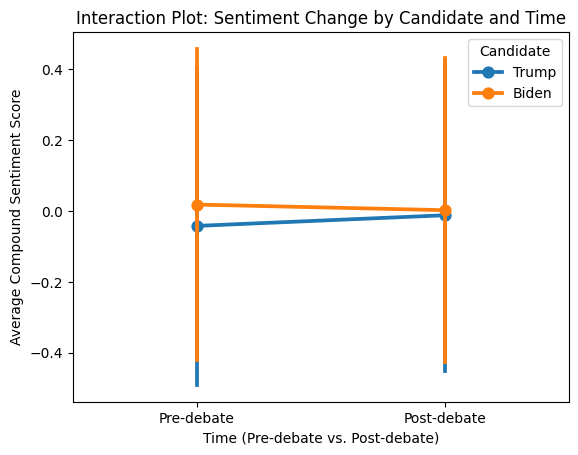

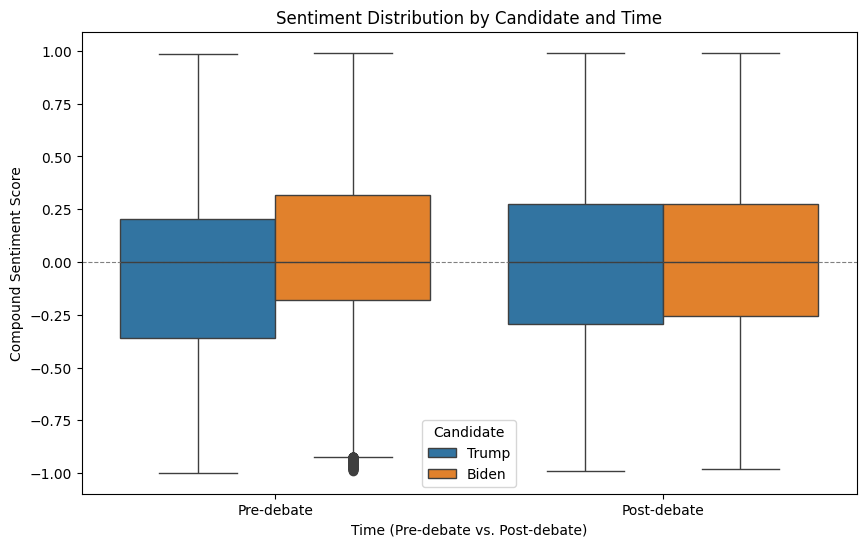

In [12]:
import seaborn as sns

# Create a lineplot to visualize interaction
sns.pointplot(data=anova_df, x='Time', y='Compound_Score', hue='Candidate', ci='sd')
plt.title('Interaction Plot: Sentiment Change by Candidate and Time')
plt.xlabel('Time (Pre-debate vs. Post-debate)')
plt.ylabel('Average Compound Sentiment Score')
plt.show()

# Boxplot grouped by Candidate and Time
plt.figure(figsize=(10, 6))
sns.boxplot(data=anova_df, x='Time', y='Compound_Score', hue='Candidate')
plt.title('Sentiment Distribution by Candidate and Time')
plt.xlabel('Time (Pre-debate vs. Post-debate)')
plt.ylabel('Compound Sentiment Score')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # Add a reference line at 0
plt.legend(title='Candidate')
plt.show()


 Geographical sentiment analysis focusing on swing states. Uses a T-test or other statistical tests to determine if sentiment changes are significant within the swing states.
Based on the results, identify which candidate had more positive sentiment shifts in swing states and whether the shifts were significant. Determine if specific swing states exhibited stronger sentiment changes than others, which could imply a targeted effect of debate performance or other events.


In [15]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Load the permanently cleaned dataset with sentiment scores
df = pd.read_csv("debate_tweets_with_sentiment.csv")

# Ensure 'created_at' is in datetime format for filtering
df['created_at'] = pd.to_datetime(df['created_at'])

# Define swing states with their associated keywords
swing_states = {
    "Arizona": ["arizona", "Arizona", "AZ", "Az", "az"],
    "Florida": ["florida", "Florida", "FL", "Fl", "fl"],
    "Georgia": ["georgia", "Georgia", "GA", "Ga", "ga"],
    "Iowa": ["iowa", "Iowa", "IA", "Ia", "ia"],
    "Maine": ["maine", "Maine", "ME", "Me", "me"],
    "Michigan": ["michigan", "Michigan", "MI", "Mi", "mi"],
    "Minnesota": ["minnesota", "Minnesota", "MN", "Mn", "mn"],
    "Nebraska": ["nebraska", "Nebraska", "NE", "Ne", "ne"],
    "Nevada": ["nevada", "Nevada", "NV", "Nv", "nv"],
    "New Hampshire": ["new hampshire", "New Hampshire", "NH", "Nh", "nh"],
    "North Carolina": ["north carolina", "North Carolina", "NC", "Nc", "nc"],
    "Ohio": ["ohio", "Ohio", "OH", "Oh", "oh"],
    "Pennsylvania": ["pennsylvania", "Pennsylvania", "PA", "Pa", "pa"],
    "Texas": ["texas", "Texas", "TX", "Tx", "tx"],
    "Wisconsin": ["wisconsin", "Wisconsin", "WI", "Wi", "wi"]
}

# Define the specific dates for filtering: October 21 and October 23, 2020
date_before = pd.to_datetime("2020-10-21")
date_after = pd.to_datetime("2020-10-23")

# Prepare a list to store statistics for each swing state and candidate
summary_list = []

# Loop over each swing state and filter tweets based on user_location
for state, keywords in swing_states.items():
    # Create a regex pattern from keywords (case insensitive)
    pattern = '|'.join(keywords)

    # Filter tweets for this swing state based on user_location
    state_df = df[df['user_location'].str.contains(pattern, case=False, na=False)]

    # Further filter tweets for the day before and the day after the debate
    filtered_df = state_df[(state_df['created_at'].dt.date == date_before.date()) |
                           (state_df['created_at'].dt.date == date_after.date())]

    # If no tweets exist for this state, skip to the next one
    if filtered_df.empty:
        continue

    # Process each candidate separately (Trump and Biden)
    for candidate in ['trump', 'biden']:
        candidate_df = filtered_df[filtered_df['about'] == candidate]

        # If no tweets exist for this candidate in this state, skip to the next one
        if candidate_df.empty:
            continue

        # Separate tweets by date (before and after the debate)
        before_df = candidate_df[candidate_df['created_at'].dt.date == date_before.date()]
        after_df = candidate_df[candidate_df['created_at'].dt.date == date_after.date()]

        # Calculate statistics: count, mean, and standard deviation of Compound_Score
        count_before = len(before_df)
        count_after = len(after_df)
        mean_before = before_df['Compound_Score'].mean() if count_before > 0 else np.nan
        std_before = before_df['Compound_Score'].std() if count_before > 1 else np.nan
        mean_after = after_df['Compound_Score'].mean() if count_after > 0 else np.nan
        std_after = after_df['Compound_Score'].std() if count_after > 1 else np.nan

        # Perform an independent two-sample t-test if both groups have sufficient data
        if count_before > 1 and count_after > 1:
            t_stat, p_val = ttest_ind(before_df['Compound_Score'], after_df['Compound_Score'], equal_var=False)
        else:
            t_stat, p_val = np.nan, np.nan

        # Append results to summary list
        summary_list.append({
            'State': state,
            'Candidate': candidate,
            'Tweets_Before': count_before,
            'Mean_Before': mean_before,
            'Std_Before': std_before,
            'Tweets_After': count_after,
            'Mean_After': mean_after,
            'Std_After': std_after,
            'T_statistic': t_stat,
            'P_value': p_val
        })

# Convert summary list into a DataFrame for easier analysis
summary_df = pd.DataFrame(summary_list)

# Save results to a CSV file (optional)
summary_df.to_csv("..\\DATA\\swing_state_sentiment_summary.csv", index=False)

# Display the resulting summary DataFrame
print(summary_df)

# Filter out rows with NaN T-statistics or P-values (insufficient data)
filtered_summary_df = summary_df.dropna(subset=['T_statistic', 'P_value'])

# Separate Trump and Biden data
trump_data = filtered_summary_df[filtered_summary_df['Candidate'] == 'trump']
biden_data = filtered_summary_df[filtered_summary_df['Candidate'] == 'biden']

# Sort by T-statistic to find the most significant shifts
# For Trump, a positive T-statistic indicates sentiment shifted towards Trump
# For Biden, a positive T-statistic indicates sentiment shifted towards Biden
trump_sorted = trump_data.sort_values(by='T_statistic', ascending=False)
biden_sorted = biden_data.sort_values(by='T_statistic', ascending=False)

# Get the top 5 states with the most significant shifts for each candidate
top_5_trump = trump_sorted.head(5)
top_5_biden = biden_sorted.head(5)

# Display results
print("Top 5 States with Sentiment Shifting Towards Trump:")
print(top_5_trump[['State', 'T_statistic', 'P_value']])

print("\nTop 5 States with Sentiment Shifting Towards Biden:")
print(top_5_biden[['State', 'T_statistic', 'P_value']])

             State Candidate  Tweets_Before  Mean_Before  Std_Before  \
0          Arizona     trump            132    -0.014495    0.409999   
1          Arizona     biden            139     0.021412    0.435603   
2          Florida     trump            516     0.015051    0.469688   
3          Florida     biden            424     0.087052    0.449443   
4          Georgia     trump            494    -0.058341    0.459959   
5          Georgia     biden            307     0.027052    0.435657   
6             Iowa     trump           1617    -0.030689    0.434883   
7             Iowa     biden            955     0.031798    0.429892   
8            Maine     trump            631    -0.082172    0.470430   
9            Maine     biden            435     0.136436    0.539882   
10        Michigan     trump            523    -0.014160    0.438378   
11        Michigan     biden            348     0.041671    0.413903   
12       Minnesota     trump             85    -0.017567    0.50

A visual analysis: a bar chart showing the top 5 states with the most significant sentiment shifts toward Trump and Biden (based on the T-statistic)

<ipython-input-16-3cc80b7dedd5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_trump['Shift'] = 'Trump'
<ipython-input-16-3cc80b7dedd5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_biden['Shift'] = 'Biden'


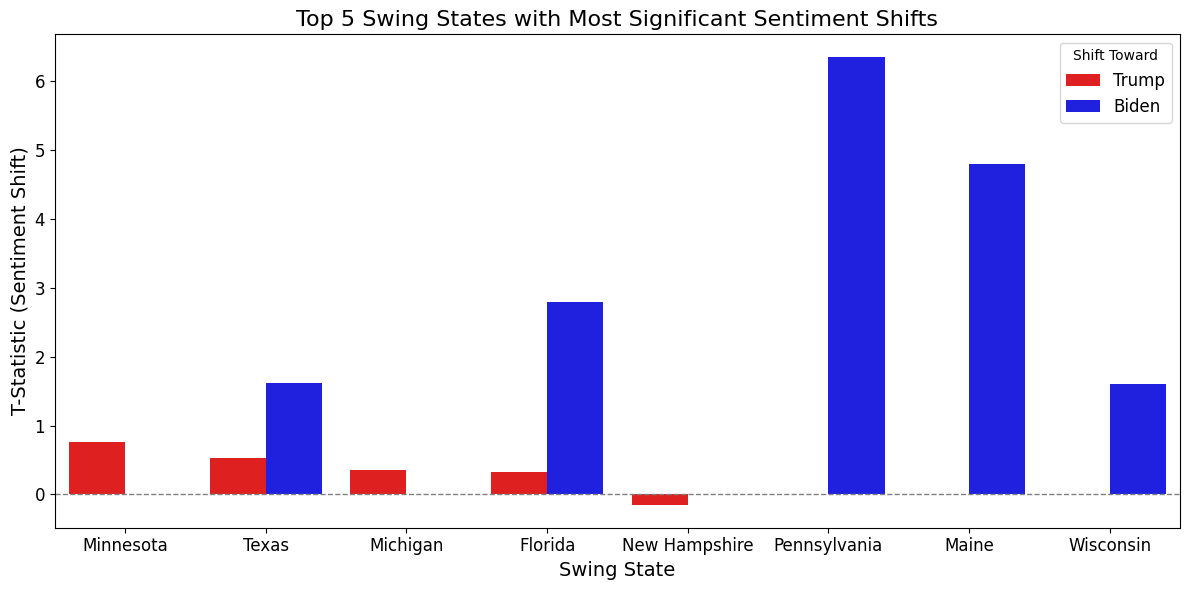

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the top 5 states for Trump and Biden into a single DataFrame for visualization
top_5_trump['Shift'] = 'Trump'
top_5_biden['Shift'] = 'Biden'
combined_top_5 = pd.concat([top_5_trump, top_5_biden])

# Set up the plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=combined_top_5,
    x='State',
    y='T_statistic',
    hue='Shift',
    palette={'Trump': 'red', 'Biden': 'blue'}
)

# Add titles and labels
plt.title('Top 5 Swing States with Most Significant Sentiment Shifts', fontsize=16)
plt.xlabel('Swing State', fontsize=14)
plt.ylabel('T-Statistic (Sentiment Shift)', fontsize=14)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Add a horizontal line at T=0 for reference
plt.legend(title='Shift Toward', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()